In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

import random
import os
import torch.random
import numpy as np

from sklearn.ensemble import RandomForestClassifier

from collections import Counter
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, roc_auc_score
from scikitplot.metrics import plot_roc, plot_precision_recall, plot_cumulative_gain, plot_lift_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV

import warnings
warnings.filterwarnings('ignore')

In [5]:
#!/Users/nataliaiakubenko/opt/anaconda3/bin/python3 -m pip install scikit-plot

In [46]:
from sklearn.ensemble import IsolationForest

In [47]:
#!/Users/nataliaiakubenko/opt/anaconda3/bin/python3 -m pip install lightgbm==2.0.10

In [45]:
#import lightgbm

In [6]:
def seed_everything(seed=7575):
    random.seed(seed)
    os.environ['PYTHONHASHSEED']=str(seed)
    np.random.seed(seed)

    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.random.manual_seed(seed)

seed_everything()

In [7]:
train = pd.read_excel("Задача 1. Датасет 1. Тренировочный неразмеченный.xlsx", index_col='Параметр')
test = pd.read_excel("Задача 1. Датасет 1. Тренировочный размеченный.xlsx", index_col='Параметр')

In [8]:
pd_train = train.copy()
pd_test = test.copy()

pd_test['target'] = 0


In [9]:
data = pd.merge(left=pd_train, right=pd_test[['target']], left_on=pd_train.index, right_on=pd_test.index, how='left')
data.fillna(1, inplace=True)
data.set_index('key_0', inplace=True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1),
                                                    data[['target']],
                                                    test_size=.3,
                                                    shuffle=False)

In [12]:
y_train

,target
key_0,
2021-03-24 13:30:00,1.0
2021-03-24 13:40:00,1.0
2021-03-24 13:50:00,0.0
2021-03-24 14:00:00,0.0
2021-03-24 14:10:00,0.0
...,...
2021-12-24 02:10:00,0.0
2021-12-24 02:20:00,0.0
2021-12-24 02:30:00,0.0


## Random Forest

In [13]:
model_g = RandomForestClassifier()
model_g.fit(X_train, y_train)

pred = model_g.predict(X_test)

pred_df = pd.DataFrame(data=pred, columns=['pred'], index=y_test.index)

y_score = model_g.predict_proba(X_test)

99.36
81.24
81.24
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     11018
         1.0       0.97      0.62      0.76       184

    accuracy                           0.99     11202
   macro avg       0.98      0.81      0.88     11202
weighted avg       0.99      0.99      0.99     11202



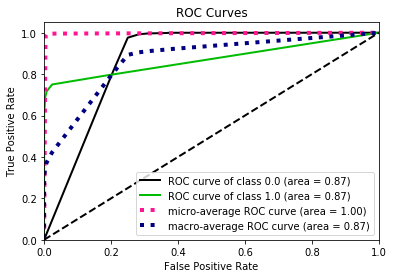

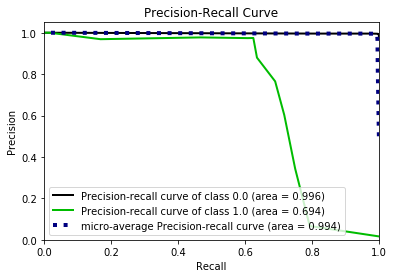

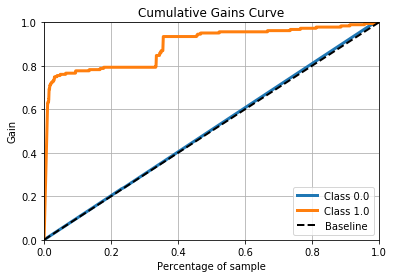

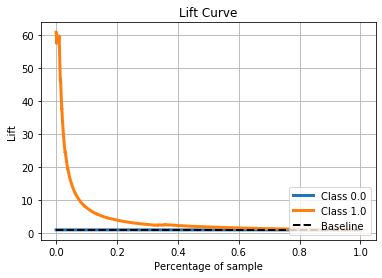

In [14]:
def print_res(y_test, y_pred, y_score=None):
    print(np.round(accuracy_score(y_test, y_pred)*100, 2))
    print(np.round(balanced_accuracy_score(y_test, y_pred)*100, 2))
    print(np.round(roc_auc_score(y_test, y_pred)*100, 2))
    print(classification_report(y_test, y_pred))


    # Графики
    if y_score is not None:
        plot_roc(y_test, y_score)
        plt.show()

        plot_precision_recall(y_test, y_score)
        plt.show()

        plot_cumulative_gain(y_test, y_score)
        plt.show()

        plot_lift_curve(y_test, y_score)
        plt.show()


print_res(y_test, pred_df, y_score)

### Log Reg

In [16]:
model_logreg = LogisticRegressionCV(cv=5, max_iter=1000, Cs=15)

model_logreg.fit(X_train, y_train)

pred = model_logreg.predict(X_test)

pred_df = pd.DataFrame(data=pred, columns=['pred'], index=y_test.index)

y_score = model_g.predict_proba(X_test)

98.88
66.83
66.83
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     11018
         1.0       0.94      0.34      0.50       184

    accuracy                           0.99     11202
   macro avg       0.96      0.67      0.75     11202
weighted avg       0.99      0.99      0.99     11202



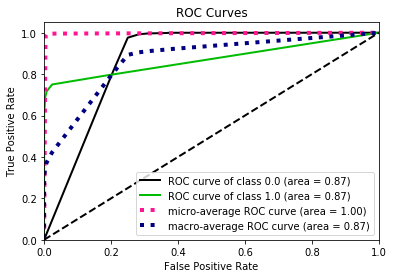

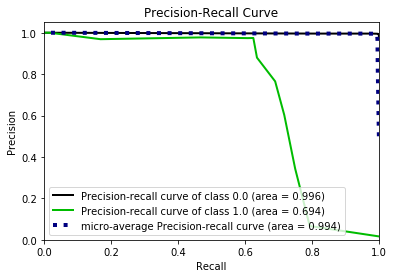

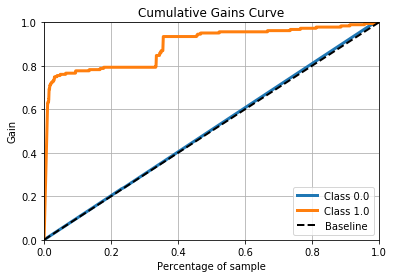

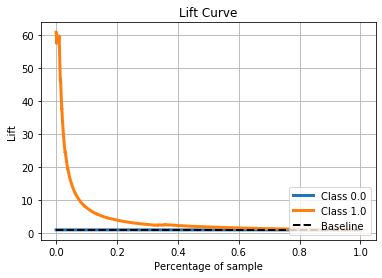

In [17]:
print_res(y_test, pred_df, y_score)

### Boosting

In [22]:
from catboost import CatBoostClassifier, Pool

In [23]:
train_pool = Pool(X_train, y_train)
eval_pool = Pool(X_test, y_test)

In [24]:
model_boost = CatBoostClassifier(verbose=0)

model_boost.fit(train_pool, eval_set=eval_pool)

In [25]:
pred = model_boost.predict(eval_pool)

pred_df = pd.DataFrame(data=pred, columns=['pred'], index=y_test.index)

y_score = model_boost.predict_proba(X_test)

98.54
57.04
57.04
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     11018
         1.0       0.81      0.14      0.24       184

    accuracy                           0.99     11202
   macro avg       0.90      0.57      0.62     11202
weighted avg       0.98      0.99      0.98     11202



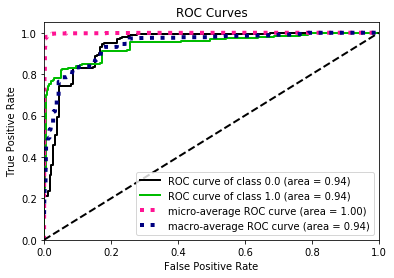

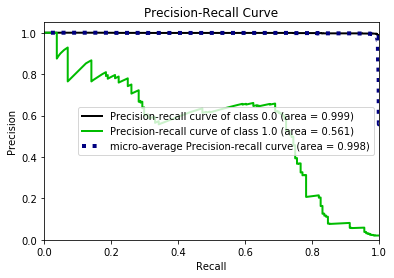

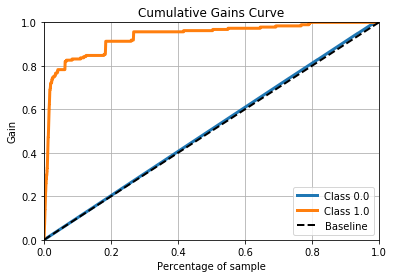

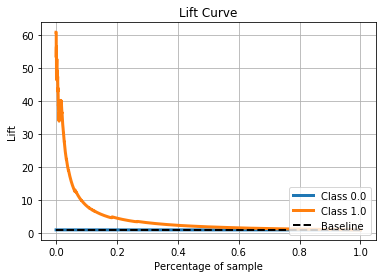

In [26]:
print_res(y_test, pred_df, y_score)

# IsolationForest

In [49]:
X_train

,х001,х002,х005,х006,х007,х008,х009,х010,х011,х012,...,х039,х040,х041,х042,х043,х044,х045,х046,х047,х048
key_0,,,,,,,,,,,,,,,,,,,,,
2021-03-24 13:30:00,554.01,546.45,568.66,553.95,550.21,549.53,564.10,564.59,555.75,553.00,...,545.17,534.33,531.89,533.32,564.66,554.75,539.90,537.91,562.42,566.70
2021-03-24 13:40:00,566.22,557.23,583.57,567.53,564.84,560.93,580.80,580.53,570.74,563.59,...,566.10,549.94,547.08,547.60,578.51,572.07,553.96,550.94,571.90,578.61
2021-03-24 13:50:00,577.64,566.55,590.45,576.19,573.11,571.31,590.91,589.67,579.19,569.13,...,577.83,560.46,556.89,555.97,585.74,581.30,561.09,560.34,577.21,577.46
2021-03-24 14:00:00,586.00,572.80,599.18,585.74,580.65,578.99,596.22,597.53,585.06,574.26,...,591.73,569.11,565.92,564.06,589.19,591.20,569.13,568.94,581.37,585.81
2021-03-24 14:10:00,588.59,573.98,600.51,590.21,583.39,582.58,594.09,594.99,586.70,571.53,...,597.62,573.98,569.60,567.60,584.83,595.38,572.04,571.79,583.09,588.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24 02:10:00,559.90,564.58,555.70,544.38,547.19,573.51,575.27,572.28,571.74,574.73,...,562.47,568.46,566.20,562.24,553.45,545.78,547.22,557.35,563.72,562.25
2021-12-24 02:20:00,559.93,564.80,556.01,544.46,547.52,573.53,575.63,572.40,571.95,574.58,...,563.00,568.87,566.36,562.40,553.57,545.78,547.24,557.38,564.02,562.37
2021-12-24 02:30:00,559.83,564.76,555.76,544.03,547.44,573.10,575.48,571.94,571.59,574.32,...,562.30,568.30,566.21,562.29,553.53,545.76,546.85,557.35,564.10,562.10


In [84]:
model_isolation_forest = IsolationForest(random_state=0, 
                                         n_estimators=100,
                                         contamination =0.005).fit(X_train)

In [85]:
pred_isolation_forest = model_isolation_forest.predict(X_test)

In [87]:
pred_isolation_forest = np.where(pred_isolation_forest == 1, 0, pred_isolation_forest)

In [88]:
pred_isolation_forest = np.where(pred_isolation_forest == -1, 1, pred_isolation_forest)

In [89]:
pred_isolation_forest.mean()

0.03026245313336904

In [90]:
print_res(y_test, pred_isolation_forest, y_score=None)

96.17
61.45
61.45
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     11018
         1.0       0.14      0.26      0.18       184

    accuracy                           0.96     11202
   macro avg       0.56      0.61      0.58     11202
weighted avg       0.97      0.96      0.97     11202



# MODEL on 1 fe

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

In [93]:
X_train.columns

Index(['х001', 'х002', 'х005', 'х006', 'х007', 'х008', 'х009', 'х010', 'х011',
       'х012', 'х013', 'х014', 'х015', 'х016', 'х017', 'х018', 'х019', 'х020',
       'х021', 'х022', 'х023', 'х024', 'х025', 'х026', 'х029', 'х030', 'х031',
       'х032', 'х033', 'х034', 'х035', 'х036', 'х037', 'х038', 'х039', 'х040',
       'х041', 'х042', 'х043', 'х044', 'х045', 'х046', 'х047', 'х048'],
      dtype='object')

In [125]:
res = pd.DataFrame(columns =['col', 'roc_auc'])
for col in X_train.columns:
    clf_dt = DecisionTreeClassifier(random_state=0)
    pred_dt = cross_val_predict(clf_dt, X_train[[col]],  y_train, cv=10)
    res = res.append({'col': col ,
                      'roc_auc':roc_auc_score(y_true= y_train, y_score = pred_dt)},
                     ignore_index=True)

In [126]:
res

,col,roc_auc
0,х001,0.609282
1,х002,0.638354
2,х005,0.633523
3,х006,0.577363
4,х007,0.614881
5,х008,0.634226
6,х009,0.582022
7,х010,0.610292
8,х011,0.606179
9,х012,0.547512


# DBSCAN ?

In [91]:
from sklearn.cluster import DBSCAN

# SVM

In [128]:
from sklearn.svm import OneClassSVM

In [ ]:
model_svm = OneClassSVM(kernel ='rbf', gamma =0.001,nu=0.05).fit(X_train)

In [ ]:
pred_svm = model_isolation_forest.predict(X_test)

In [ ]:
pred_svm = np.where(pred_svm == 1, 0, pred_svm)
pred_svm = np.where(pred_svm == -1, 1, pred_svm)

In [ ]:
print_res(y_test, pred_svm, y_score=None)